In [1]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [84]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
import re
import unicodedata
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline


import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meghnarana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghnarana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/meghnarana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/meghnarana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/meghnarana/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/meghnarana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
#Reading the data: csv file for Amazon Reviews of various products

data = pd.read_csv("amazon_reviews.csv", sep=",")
data.head(4)
data.shape
data.isnull().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

## Preprocessing the data and text


In [87]:
# Converting to lower case,replacing punctuations and numbers with space:

data['reviewText']=data['reviewText'].str.replace('[^\w\s]','')
data['reviewText']=data['reviewText'].str.replace('\d','')
data['reviewText']=data['reviewText'].str.lower()

#Removing urls:

data['reviewText'] = data['reviewText'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

print(data['reviewText'])

0                                                                                                 no issues
1       purchased this for my device it worked as advertised you can never have too much phone memory si...
2       it works as expected i should have sprung for the higher capacity  i think its made a bit cheesi...
3       this think has worked out greathad a diff bran gb card and if went south after  monthsthis one h...
4       bought it with retail packaging arrived legit in a orange envelope english version not asian lik...
                                                       ...                                                 
4910    i bought this sandisk gb class  to use with my htc inspire after  months i am getting constant e...
4911    used this for extending the capabilities of my samsung galaxy note   it greatly expands it use a...
4912    great card that is very fast and reliable it comes with an optional adapter for sd slots being t...
4913               good amou

In [88]:
data['reviewText']=data['reviewText'].fillna('Missing')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4915 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [89]:
# Removing HTML tags:

#data['reviewText']=data['reviewText'].apply(lambda x: unicodedata.normalize('NFKD', str(x).encode('ascii', 'ignore').decode('utf-8', 'ignore')[0]))
data['reviewText']=data['reviewText'].apply(lambda x: BeautifulSoup(str(x), 'html.parser').get_text())


#removing extra white spaces:

data['reviewText']=data['reviewText'].replace((r'^\s*|\s\s*', ' '))

In [90]:
data['review_len'] = data['reviewText'].astype(str).apply(len)
data['word_count'] = data['reviewText'].apply(lambda x: len(str(x).split()))
#print(data.columns)

new = data["reviewTime"].str.split("-", n = 1, expand = True) 
  
# making separate date column from new data frame 
data["year"]= new[0] 
  
# making separate year column from new data frame 
data["date"]= new[1] 

data=data.drop(['reviewTime'], axis=1)
print(data.columns)

print(data.head(5))

new1 = data["date"].str.split("-", n = 1, expand = True) 
  
# adding month to the main dataset 
data["month"]= new1[0] 
  
# adding day to the main dataset 
data["day"]= new1[1] 

data=data.drop(['date'], axis=1)
data.head()

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'day_diff', 'helpful_yes',
       'total_vote', 'review_len', 'word_count', 'year', 'date'],
      dtype='object')
       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                                                                            reviewText  \
0                                                                                            no issues   
1  purchased this for my device it worked as advertised you can never have too much phone memory si...   
2  it works as expected i should have sprung for the higher capacity  i think its made a bit cheesi...   
3  this think

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,day_diff,helpful_yes,total_vote,review_len,word_count,year,month,day
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,4.0,Four Stars,1406073600,138,0,0,9,2,2014,07,23
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as advertised you can never have too much phone memory si...,5.0,MOAR SPACE!!!,1382659200,409,0,0,154,31,2013,10,25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for the higher capacity i think its made a bit cheesi...,4.0,nothing to really say....,1356220800,715,0,0,163,31,2012,12,23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out greathad a diff bran gb card and if went south after monthsthis one h...,5.0,Great buy at this price!!! *** UPDATE,1384992000,382,0,0,312,65,2013,11,21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit in a orange envelope english version not asian lik...,5.0,best deal around,1373673600,513,0,0,278,50,2013,07,13


In [91]:
# Splitting the dataset based on comma and square bracket 
new1 = data["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)
#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)
#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
    helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
    helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
data['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
data=data.drop(['helpful'], axis=1)

In [92]:
print(data['reviewText'])

0                                                                                                 no issues
1       purchased this for my device it worked as advertised you can never have too much phone memory si...
2       it works as expected i should have sprung for the higher capacity  i think its made a bit cheesi...
3       this think has worked out greathad a diff bran gb card and if went south after  monthsthis one h...
4       bought it with retail packaging arrived legit in a orange envelope english version not asian lik...
                                                       ...                                                 
4910    i bought this sandisk gb class  to use with my htc inspire after  months i am getting constant e...
4911    used this for extending the capabilities of my samsung galaxy note   it greatly expands it use a...
4912    great card that is very fast and reliable it comes with an optional adapter for sd slots being t...
4913               good amou

In [93]:
# Tokenization

data['reviewText'].apply(lambda x: TextBlob(x).words).head()

0                                                                                           [no, issues]
1    [purchased, this, for, my, device, it, worked, as, advertised, you, can, never, have, too, much,...
2    [it, works, as, expected, i, should, have, sprung, for, the, higher, capacity, i, think, its, ma...
3    [this, think, has, worked, out, greathad, a, diff, bran, gb, card, and, if, went, south, after, ...
4    [bought, it, with, retail, packaging, arrived, legit, in, a, orange, envelope, english, version,...
Name: reviewText, dtype: object

## Text Normalization:

In [94]:
# Perform Lemmatization:(write why we used Lemmatization and not stemming???????????)

data['reviewText'] = data['reviewText'].apply(lambda y: " ".join([Word(i).lemmatize() for i in y.split()]))

data['reviewText'].head(10)

0                                                                                               no issue
1    purchased this for my device it worked a advertised you can never have too much phone memory sin...
2    it work a expected i should have sprung for the higher capacity i think it made a bit cheesier t...
3    this think ha worked out greathad a diff bran gb card and if went south after monthsthis one ha ...
4    bought it with retail packaging arrived legit in a orange envelope english version not asian lik...
5    it mini storage it doesnt do anything else and it not supposed to i purchased it to add addition...
6    i have it in my phone and it never skip a beat file transfer are speedy and have not had any cor...
7    it hard to believe how affordable digital ha become gb in a device one quarter the sie of postag...
8    work in a htc rezound wa running short of space on a gb sandisk so i ordered this when it came o...
9    in my galaxy s super fast card and am totally happ

## Text Visualizations from Reviews:

In [95]:
# Word frequencies:
freq = data['reviewText'].apply(lambda y: pd.value_counts(y.split(" "))).sum(axis=0).reset_index()

freq.columns = ["words", "freq"]
print(freq.head())
print(freq.shape)
print(freq["words"].nunique())
freq["freq"].describe().T

   words    freq
0     no  1261.0
1  issue   609.0
2      a  7105.0
3    for  4035.0
4   this  4494.0
(9109, 2)
9109


count    9109.000000
mean       26.678230
std       250.935286
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max      9084.000000
Name: freq, dtype: float64

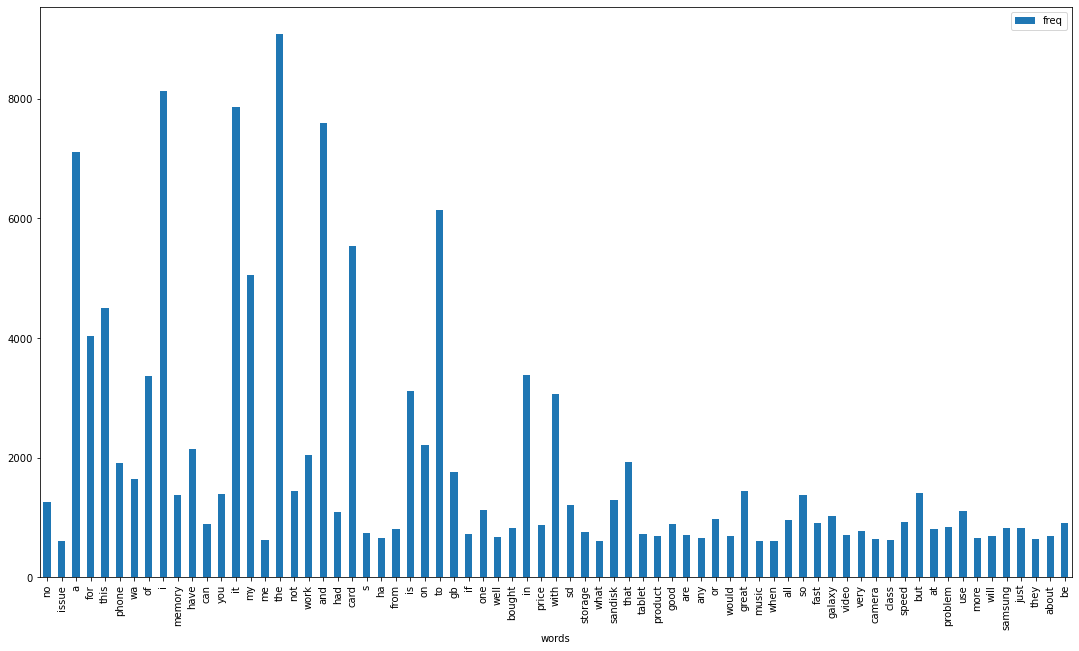

In [96]:
freq[freq["freq"] > 600].plot.bar(x="words", y="freq")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('bar.png', dpi=100)
plt.show()

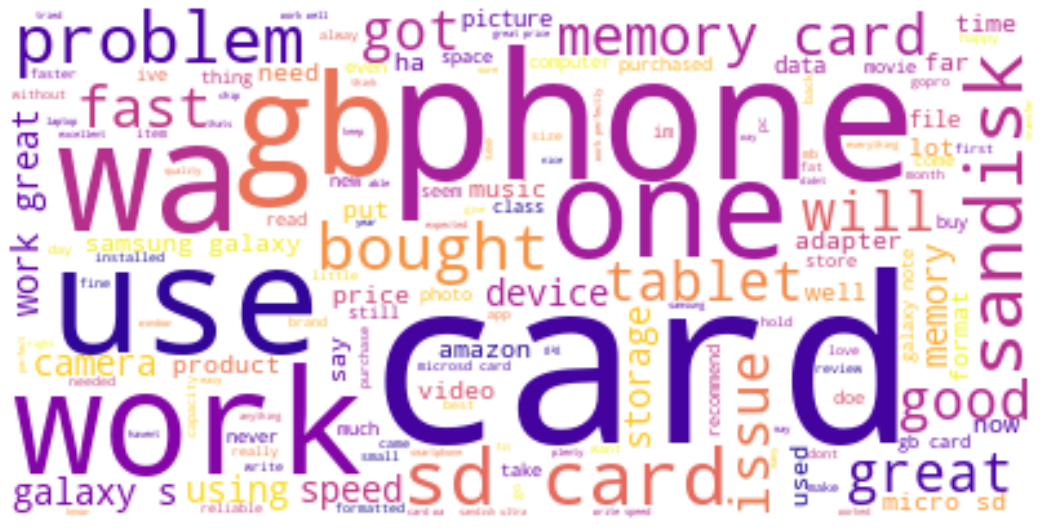

In [97]:
# Wordcloud:
from wordcloud import WordCloud, STOPWORDS
cloudtxt = " ".join(k for k in data.reviewText)
wc = WordCloud(stopwords=STOPWORDS,max_words=150,background_color="white",colormap='plasma').generate(cloudtxt)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Wordcloud1.png', dpi=100)
plt.show()
plt.show()

## Sentiment Analysis:

In [98]:
analyzer = SentimentIntensityAnalyzer()

In [99]:
data["Sentiment_score"] = data['reviewText'].apply(lambda y: analyzer.polarity_scores(y)["compound"])
data.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,day_diff,helpful_yes,total_vote,review_len,word_count,year,month,day,helpful_rate,Sentiment_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,no issue,4.0,Four Stars,1406073600,138,0,0,9,2,2014,07,23,0.0,-0.2960
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,purchased this for my device it worked a advertised you can never have too much phone memory sin...,5.0,MOAR SPACE!!!,1382659200,409,0,0,154,31,2013,10,25,0.0,-0.2960
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,it work a expected i should have sprung for the higher capacity i think it made a bit cheesier t...,4.0,nothing to really say....,1356220800,715,0,0,163,31,2012,12,23,0.0,-0.3089
3,A3H99DFEG68SR,B007WTAJTO,1m2,this think ha worked out greathad a diff bran gb card and if went south after monthsthis one ha ...,5.0,Great buy at this price!!! *** UPDATE,1384992000,382,0,0,312,65,2013,11,21,0.0,0.8442
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,bought it with retail packaging arrived legit in a orange envelope english version not asian lik...,5.0,best deal around,1373673600,513,0,0,278,50,2013,07,13,0.0,0.7087


## Sentiment Modelling from Reviews:

In [100]:
#Adding Sentiment column:
data["sentiment"] = data['reviewText'].apply(lambda y: "positive" if analyzer.polarity_scores(y)["compound"] > 0  else "neutral"  if analyzer.polarity_scores(y)["compound"] == 0 else  "negative"  )
data.head(20)

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,day_diff,helpful_yes,total_vote,review_len,word_count,year,month,day,helpful_rate,Sentiment_score,sentiment
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,no issue,4.0,Four Stars,1406073600,138,0,0,9,2,2014,07,23,0.0,-0.2960,negative
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,purchased this for my device it worked a advertised you can never have too much phone memory sin...,5.0,MOAR SPACE!!!,1382659200,409,0,0,154,31,2013,10,25,0.0,-0.2960,negative
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,it work a expected i should have sprung for the higher capacity i think it made a bit cheesier t...,4.0,nothing to really say....,1356220800,715,0,0,163,31,2012,12,23,0.0,-0.3089,negative
3,A3H99DFEG68SR,B007WTAJTO,1m2,this think ha worked out greathad a diff bran gb card and if went south after monthsthis one ha ...,5.0,Great buy at this price!!! *** UPDATE,1384992000,382,0,0,312,65,2013,11,21,0.0,0.8442,positive
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,bought it with retail packaging arrived legit in a orange envelope english version not asian lik...,5.0,best deal around,1373673600,513,0,0,278,50,2013,07,13,0.0,0.7087,positive
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,it mini storage it doesnt do anything else and it not supposed to i purchased it to add addition...,5.0,Not a lot to really be said,1367193600,588,0,0,269,49,2013,04,29,0.0,0.3400,positive
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,i have it in my phone and it never skip a beat file transfer are speedy and have not had any cor...,5.0,Works well,1382140800,415,0,0,396,75,2013,10,19,0.0,0.8910,positive
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""",it hard to believe how affordable digital ha become gb in a device one quarter the sie of postag...,5.0,32 GB for less than two sawbucks...what's not to like?,1404950400,62,0,0,311,57,2014,10,07,0.0,0.7951,positive
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,work in a htc rezound wa running short of space on a gb sandisk so i ordered this when it came o...,5.0,Loads of room,1395619200,259,1,1,120,26,2014,03,24,1.0,-0.2960,negative
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,in my galaxy s super fast card and am totally happy not happy having to still type to fill the r...,5.0,works great,1381449600,393,0,0,116,23,2013,11,10,0.0,0.9167,positive


In [101]:
print(data["sentiment"].value_counts())
data.groupby("sentiment")["overall"].mean()

positive    3828
negative     832
neutral      255
Name: sentiment, dtype: int64


sentiment
negative    3.911058
neutral     4.658824
positive    4.729885
Name: overall, dtype: float64

In [102]:
#Label Encoding for targets:

data["sentiment"] = LabelEncoder().fit_transform(data["sentiment"])
print(data["sentiment"])
X = data["reviewText"]
y = data["sentiment"]




0       0
1       0
2       0
3       2
4       2
       ..
4910    2
4911    2
4912    2
4913    2
4914    2
Name: sentiment, Length: 4915, dtype: int64


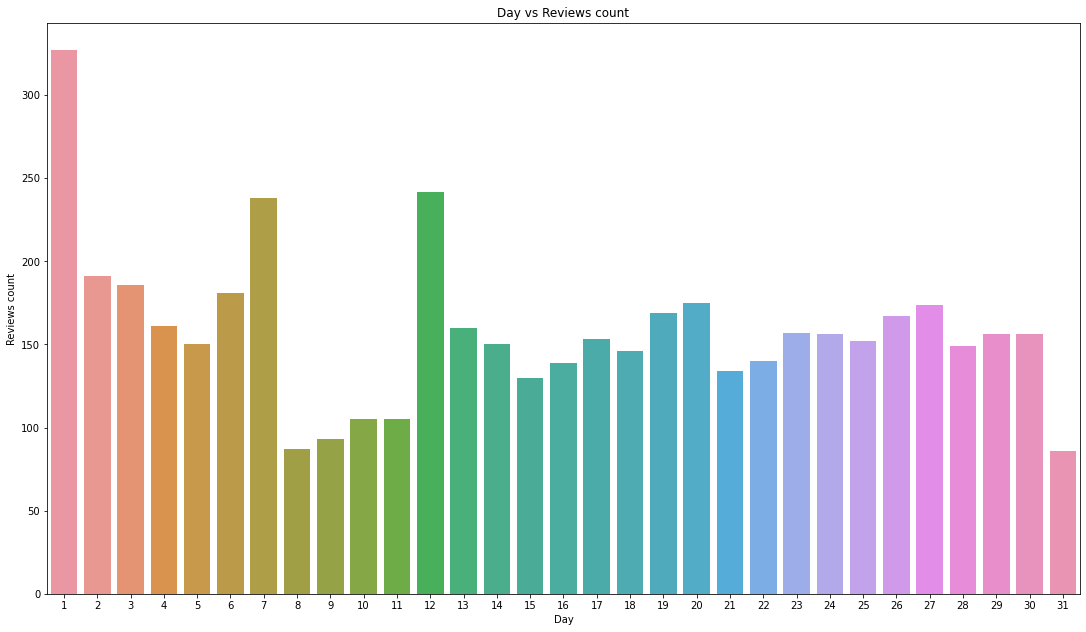

In [103]:
#Sentiment Visualizations:
#Creating a dataframe
day=pd.DataFrame(data.groupby('day')['reviewText'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviewText", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Reviews count_day.png', dpi=100)
plt.show()


In [104]:
from nltk.stem.porter import PorterStemmer
#Extracting 'reviews' for processing
stopword = stopwords.words('english')
review_features=data.copy()
review_features=review_features[['reviewText']].reset_index(drop=True)
review_features.head()
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviewText'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopword]
    review = ' '.join(review)
    corpus.append(review)    

## TF-IDF

In [105]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X_cor= tfidf_vectorizer.fit_transform(review_features['reviewText'])
X_cor.shape

(4915, 5000)

In [106]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [107]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_cor, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 3828, 0: 832, 1: 255})
Resampled dataset shape Counter({0: 3828, 2: 3828, 1: 3828})


In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 

## Splitting into Train and Test:

In [109]:
# TF-IDF N-GRAM
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=0)

In [110]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Model Selection:

In [111]:
#creating the objects
logistic_reg = LogisticRegression(random_state=0)
decision=DecisionTreeClassifier()
knn=KNeighborsClassifier()
Support_vector=SVC()
Bernoulli=BernoulliNB()
random_forest = RandomForestClassifier(random_state=17)
classify_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Randomforest'}
classifymodels=[logistic_reg,decision,knn,Support_vector,Bernoulli,random_forest]


for i,model in enumerate(classifymodels):
    print("{} Test Accuracy: {}".format(classify_dict[i],cross_val_score(model, X_cor, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7989878793899956
Decision Tree Test Accuracy: 0.7039826635537232
KNN Test Accuracy: 0.6773119401255113
SVC Test Accuracy: 0.7849461030251851
Naive Bayes Test Accuracy: 0.7519803619624792
Randomforest Test Accuracy: 0.7904450846952461


In [112]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.9416630387461907


In [113]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


Confusion matrix, without normalization


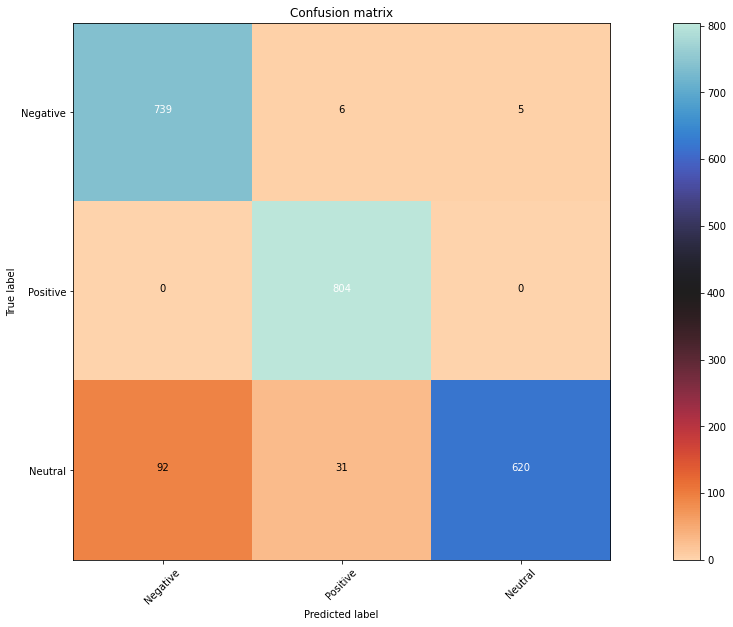

In [114]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Positive','Neutral'],cmap='icefire_r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('confusion_mat.png', dpi=100)
plt.show()

In [115]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93       750
           1       0.96      1.00      0.98       804
           2       0.99      0.83      0.91       743

    accuracy                           0.94      2297
   macro avg       0.95      0.94      0.94      2297
weighted avg       0.95      0.94      0.94      2297



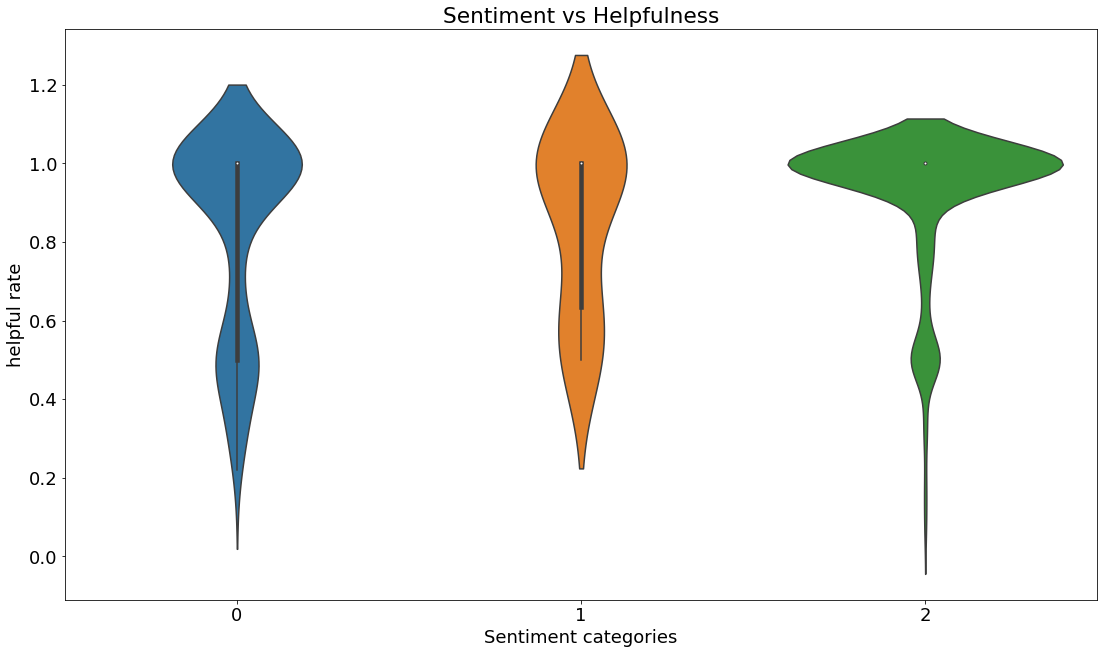

In [116]:
#plot layout
from matplotlib import rcParams
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
help_sent= pd.DataFrame(data, columns = ['sentiment', 'helpful_rate'])
help_sent = senti_help[help_sent['helpful_rate'] != 0.00] 

#Plotting phase
sns.violinplot( x=help_sent["sentiment"], y=help_sent["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Sentiment_vs_helpfulness.png', dpi=100)
plt.show()
plt.show()

In [48]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data['Sentiment_score'].iplot(
    kind='hist',
    bins=50,
    xTitle='Sentiment_score',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [49]:
data['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

 correlation coefficient for sentiment score (compound) and rating is  0.324 with a p-value of  0.000.


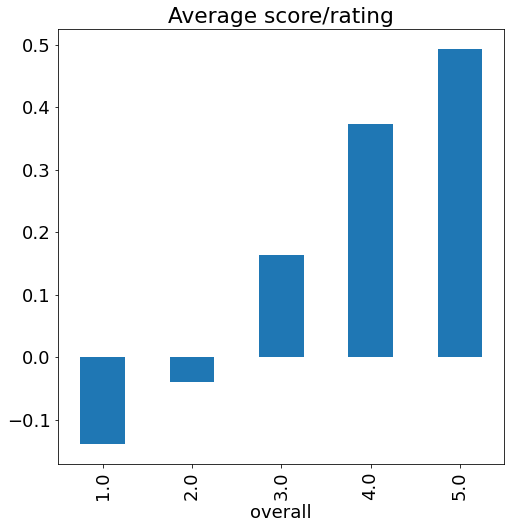

In [119]:
#Check the correlation between sentiment score (compound) and rating
import numpy as np
import scipy.stats as stats
print(" correlation coefficient for sentiment score (compound) and rating is {0[0]: .3f} with a p-value of {0[1]: .3f}.".format(stats.pearsonr(data["overall"], data["Sentiment_score"])))
data.groupby("overall").mean()["Sentiment_score"].plot(kind="bar", figsize=(8, 8))
plt.title("Average score/rating")
plt.show()

In [51]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1,2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X_cor, y, test_size=.2,
                                                    random_state=0)


In [52]:
#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))

In [53]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [54]:
#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
print(y_score.shape)
for i in range(n_classes):
    fpr[i], tpr[i],_= roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

(983, 3)


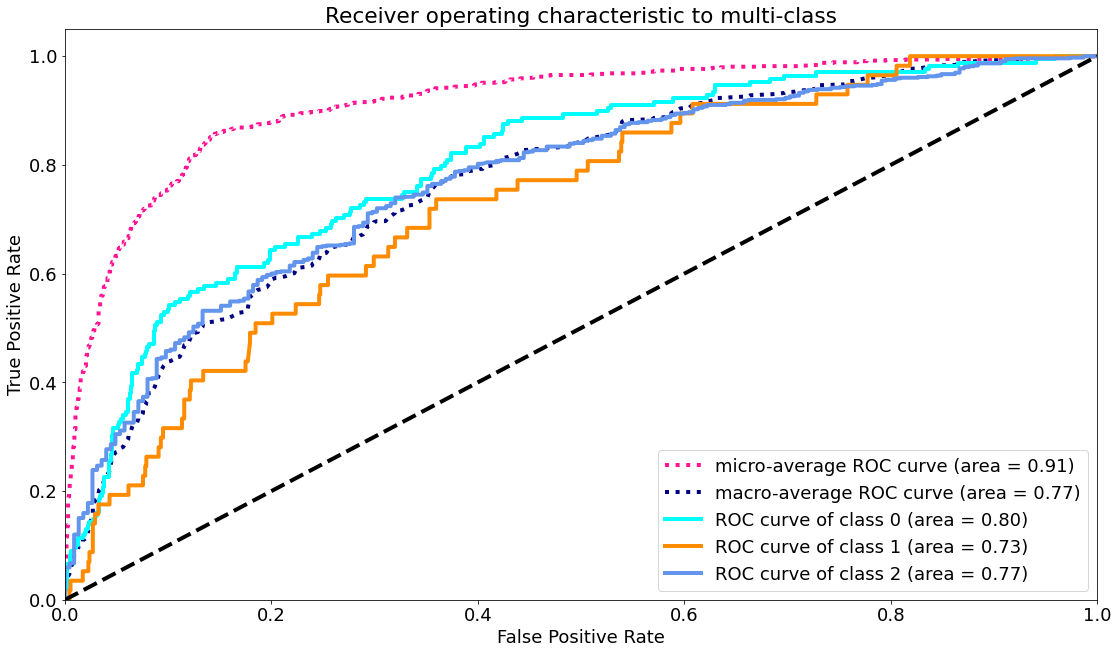

In [55]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC.png', dpi=100)
plt.show()
plt.show()


## Topic Modelling using LDA:

In [71]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt 
import pandas as pd

df = data['reviewText'].tolist()
print(df[:4])
#df=list(df)
tok = [t.split(',') for t in df]
id2word = Dictionary(tok)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tok]
print(corpus[:1])
#print(corpus)

['no issue', 'purchased this for my device it worked a advertised you can never have too much phone memory since i download a lot of stuff this wa a no brainer for me', 'it work a expected i should have sprung for the higher capacity i think it made a bit cheesier than the earlier version the paint look not a clean a before', 'this think ha worked out greathad a diff bran gb card and if went south after monthsthis one ha held up pretty well since i had my s now on my note update ive had this for a few month and have had zero issue since it wa transferred from my s to my note and into a note this card is reliable and solidcheers']
[[(0, 1)]]


In [72]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[('no issue', 1)]]

In [73]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tok, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)


\nCoherence Score:  0.855138110625513


In [74]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel


def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
df = data.reviewText.values.tolist()
data_words = list(sent_to_words(df))
print(data_words[:1])

<>:10: DeprecationWarning:

invalid escape sequence \S

<>:11: DeprecationWarning:

invalid escape sequence \s

<>:10: DeprecationWarning:

invalid escape sequence \S

<>:11: DeprecationWarning:

invalid escape sequence \s

/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_30295/734996194.py:10: DeprecationWarning:

invalid escape sequence \S

/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_30295/734996194.py:11: DeprecationWarning:

invalid escape sequence \s



[['no', 'issue']]


In [75]:
# Build the bigram and trigram models
stop_words = stopwords.words('english')
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in TextBlob(str(doc)).words if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in TextBlob(str(doc)).words  if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [76]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.074*"\'phone" + 0.040*"\'galaxy" + 0.034*"\'work" + 0.022*"\'memory" + '
  '0.021*"\'great" + 0.020*"\'music" + 0.018*"\'device" + 0.018*"\'more" + '
  '0.017*"\'use" + 0.016*"\'fast"'),
 (1,
  '0.079*"\'card" + 0.039*"\'use" + 0.033*"\'so" + 0.023*"\'problem" + '
  '0.021*"\'class" + 0.020*"\'fast" + 0.019*"\'speed" + 0.019*"\'micro" + '
  '0.019*"\'read" + 0.017*"\'camera"'),
 (2,
  '0.065*"\'card" + 0.032*"\'get" + 0.026*"\'wa" + 0.022*"\'storage" + '
  '0.021*"\'just" + 0.021*"\'work" + 0.019*"\'tablet" + 0.018*"\'format" + '
  '0.017*"\'now" + 0.016*"\'note"'),
 (3,
  '0.057*"\'good" + 0.050*"\'sandisk" + 0.049*"\'price" + 0.044*"\'work" + '
  '0.039*"\'great" + 0.038*"\'buy" + 0.027*"\'product" + 0.023*"\'memory" + '
  '0.020*"\'file" + 0.018*"\'never"')]


In [77]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.6042,"'card, 'get, 'wa, 'storage, 'just, 'work, 'tablet, 'format, 'now, 'note",['issue]
1,1,0.0,0.8576,"'phone, 'galaxy, 'work, 'memory, 'great, 'music, 'device, 'more, 'use, 'fast","['purchase, 'device, 'work, 'advertise, 'never, 'too, 'much, 'phone, 'memory, 'download, 'lot, '..."
2,2,3.0,0.6642,"'good, 'sandisk, 'price, 'work, 'great, 'buy, 'product, 'memory, 'file, 'never","['work, 'expect, 'spring, 'high, 'capacity, 'think, 'make, 'bit, 'cheesier, 'early, 'version, 'p..."
3,3,2.0,0.6942,"'card, 'get, 'wa, 'storage, 'just, 'work, 'tablet, 'format, 'now, 'note","['think, 'work, 'greathad, 'bran, 'card, 'go, 'south, 'hold, 'pretty, 'now, 'note, 'update, 've,..."
4,4,2.0,0.7956,"'card, 'get, 'wa, 'storage, 'just, 'work, 'tablet, 'format, 'now, 'note","['buy, 'retail, 'packaging, 'arrive, 'legit, 'orange, 'envelope, 'english, 'version, 'asian, 'pi..."
5,5,2.0,0.9136,"'card, 'get, 'wa, 'storage, 'just, 'work, 'tablet, 'format, 'now, 'note","['mini, 'storage, 'else, 'suppose, 'purchase, 'add, 'additional, 'storage, 'surface, 'pro, 'tabl..."
6,6,3.0,0.6714,"'good, 'sandisk, 'price, 'work, 'great, 'buy, 'product, 'memory, 'file, 'never","['phone, 'never, 'skip, 'beat, 'file, 'transfer, 'speedy, 'corruption, 'issue, 'memory, 'fade, '..."
7,7,0.0,0.6198,"'phone, 'galaxy, 'work, 'memory, 'great, 'music, 'device, 'more, 'use, 'fast","['hard, 'believe, 'affordable, 'digital, 'become, 'device, 'quarter, 'sie, 'postage, 'stamp, 'sc..."
8,8,2.0,0.5772,"'card, 'get, 'wa, 'storage, 'just, 'work, 'tablet, 'format, 'now, 'note","['work, 'htc, 'rezound, 'wa, 'run, 'short, 'space, 'sandisk, 'so, 'order, 'come, 'fast, 'issue]"
9,9,0.0,0.8446,"'phone, 'galaxy, 'work, 'memory, 'great, 'music, 'device, 'more, 'use, 'fast","['galaxy, 'super, 'fast, 'card, 'totally, 'happy, 'happy, 'have, 'still, 'type, 'fill, 'required..."


In [78]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9310,"'phone, 'galaxy, 'work, 'memory, 'great, 'music, 'device, 'more, 'use, 'fast","['purchase, 'item, 'expand, 'galaxy, 'tab, 'memory, 'fit, 'want, 'recommend, 'item]"
1,1.0,0.9483,"'card, 'use, 'so, 'problem, 'class, 'fast, 'speed, 'micro, 'read, 'camera","['use, 'gsno, 'datum, 'corruptloss, 'issue, 'encounter, 'also, 'class, 'hold, 'true, 'speed, 'cl..."
2,2.0,0.9466,"'card, 'get, 'wa, 'storage, 'just, 'work, 'tablet, 'format, 'now, 'note","['rd, 'disk, 'buy, 'work, 'few, 'month, 'then, 'nothingmy, 'tablet, 'detect, 'anymore, 'computer..."
3,3.0,0.9491,"'good, 'sandisk, 'price, 'work, 'great, 'buy, 'product, 'memory, 'file, 'never","['sandisk, 'never, 'disappoint, 'always, 'product, 'worth, 'penny, 'nice, 'product, 'quality, 'w..."


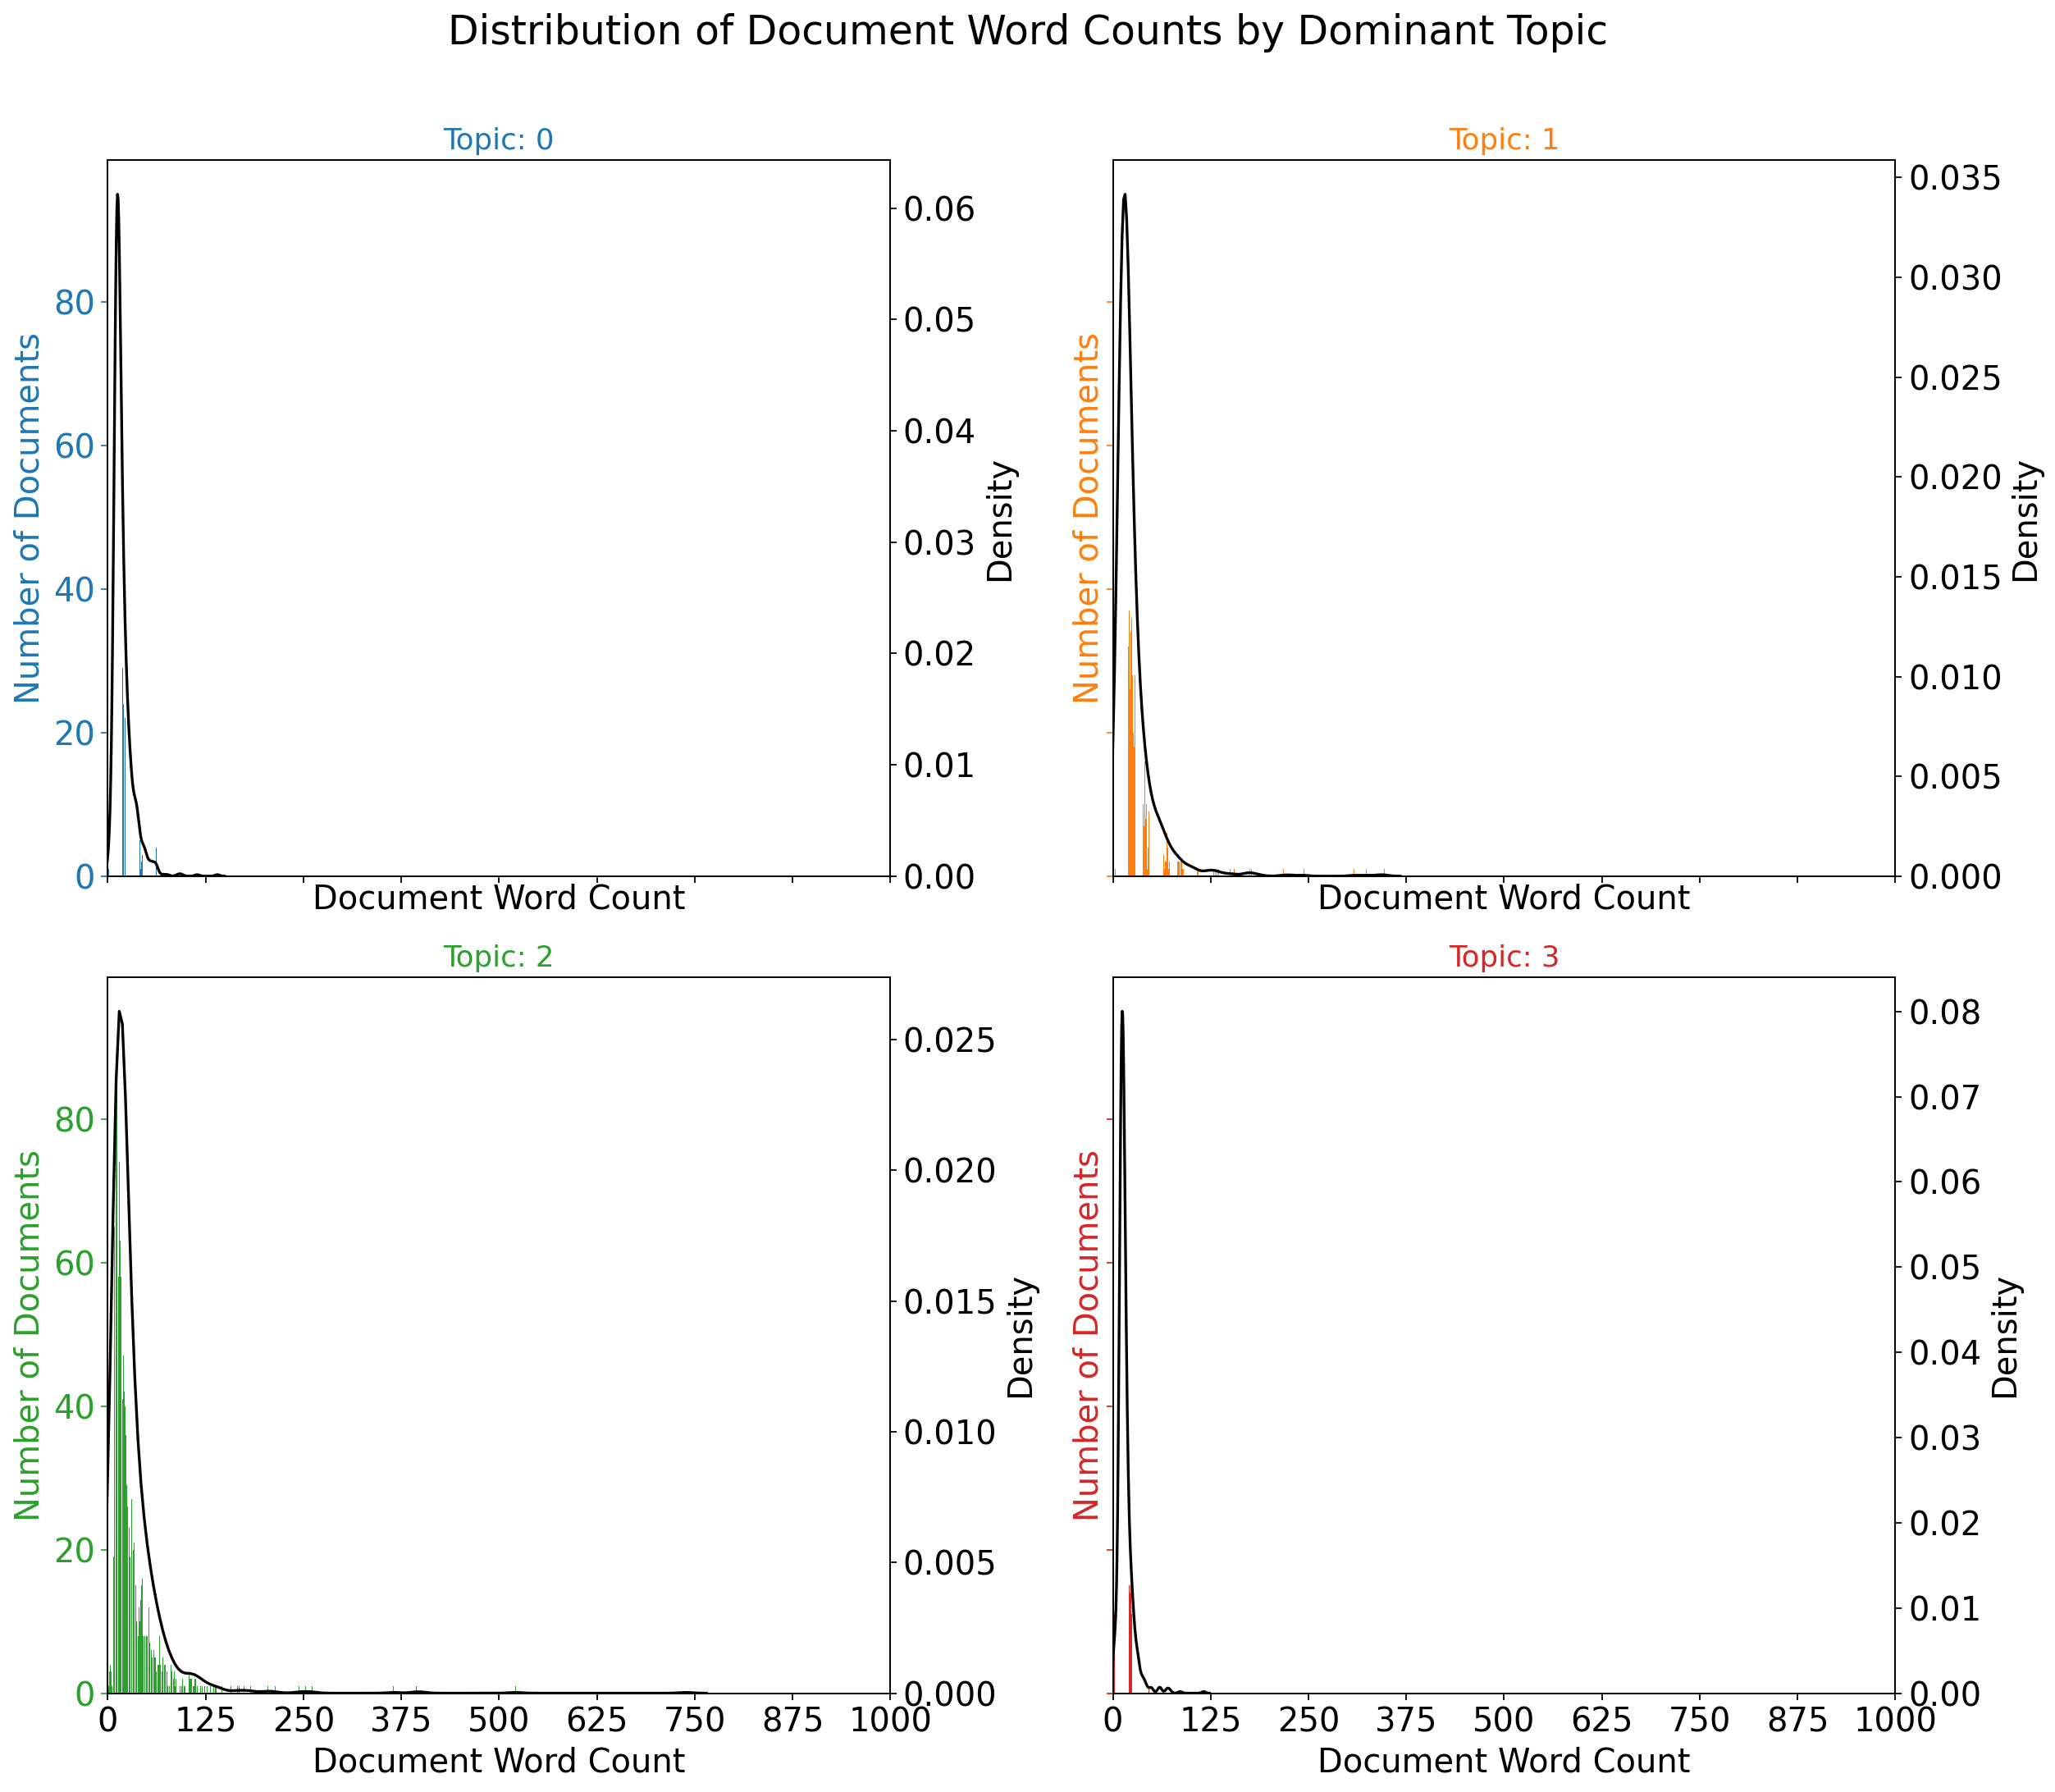

In [79]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

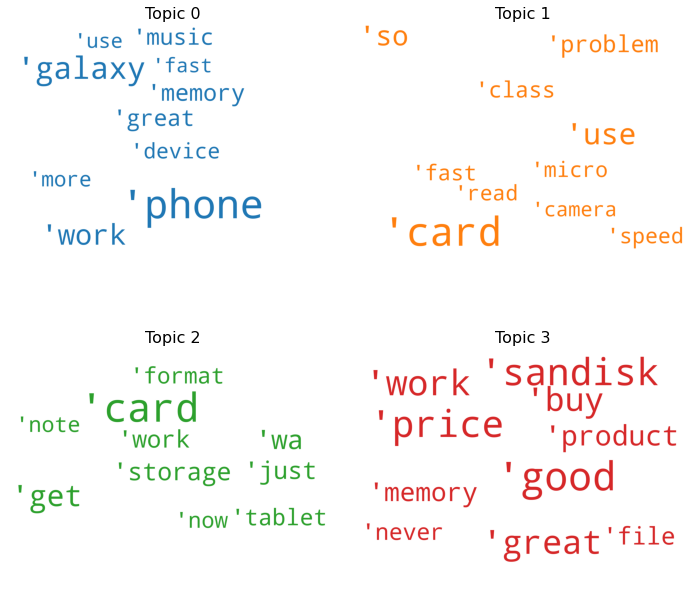

In [80]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [81]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4448 samples in 0.002s...
[t-SNE] Computed neighbors for 4448 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4448
[t-SNE] Computed conditional probabilities for sample 2000 / 4448
[t-SNE] Computed conditional probabilities for sample 3000 / 4448
[t-SNE] Computed conditional probabilities for sample 4000 / 4448
[t-SNE] Computed conditional probabilities for sample 4448 / 4448
[t-SNE] Mean sigma: 0.045496
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.402748
[t-SNE] KL divergence after 1000 iterations: 1.048428


/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



Loading BokehJS ...

/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



In [82]:
#import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.121751 -0.253728       1        1  32.480770
1     -0.240406  0.132126       2        1  29.173044
0      0.109567  0.208660       3        1  20.670009
3      0.252590 -0.087058       4        1  17.676177, topic_info=         Term         Freq        Total Category  logprob  loglift
9      'phone  1817.000000  1817.000000  Default  30.0000  30.0000
50      'good  1196.000000  1196.000000  Default  29.0000  29.0000
28      'card  5392.000000  5392.000000  Default  28.0000  28.0000
60     'price  1041.000000  1041.000000  Default  27.0000  27.0000
77   'sandisk  1387.000000  1387.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
255     'more   298.419818   734.057741   Topic4  -4.2556   0.8329
434     'time   213.002112   459.031076   Topic4  -4.5928   0.9651
596     'find   168.949523   275.280810   Topic4  -4.8245   1.2448
30        'go   200.025301   680.624496   Topic4  -4.6556   0.5084
168     'very   187.099510   738.464683   Topic4  -4.7224   0.3600

[205 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
147       2  0.998224  'adapter
286       2  0.911443     'also
286       3  0.084717     'also
300       4  0.995859   'always
373       1  0.774395   'amazon
...     ...       ...       ...
13        4  0.361206     'work
329       4  0.995757    'worth
178       2  0.997654    'write
610       4  0.989798    'wrong
431       4  0.998253     'year

[194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])